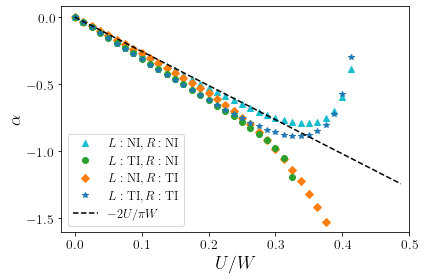

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 25 22:46:59 2021

@author: yentinglin
"""


import numpy as np
import sys 
sys.path.append('..')
from tool.tool_current_noninteracting import current_integrad
from scipy.integrate import quad
import matplotlib.pyplot as plt
from tool.tool_general import loglogder
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import rc

ans_NINI=np.load('data_paper/tau_NINI_d=0.002592_T=0.0018_E=0.00010368.npy')
ans_TINI=np.load('data_paper/tau_TINI_d=0.002592_T=0.0018_E=0.00010368.npy')
ans_NITI=np.load('data_paper/tau_NITI_d=0.002592_T=0.0018_E=0.00010368.npy')
ans_TITI=np.load('data_paper/tau_TITI_d=0.002592_T=0.0018_E=0.00010368.npy')

T=0.0018
N=40
D=1.0
T=0.0018
U_MAX=0.5
N=6
NN=40
G=8.0*T*T
d=100.0*G#*D

exponent_TITI_list=np.zeros(NN,dtype=np.float64)
exponent_NITI_list=np.zeros(NN,dtype=np.float64)
exponent_TINI_list=np.zeros(NN,dtype=np.float64)
exponent_NINI_list=np.zeros(NN,dtype=np.float64)

exponent_analytic_list=np.zeros(NN,dtype=np.float64)
exponent_analytic_list_test=np.zeros(NN,dtype=np.float64)
u_list=np.zeros(NN,dtype=np.float64)

mu_list=np.zeros(N,dtype=np.float64)


for i in range(N):
    mu=7.5*d+i*d/N
    mu_list[i]=mu

for i in range(NN):
    U=U_MAX*i/NN
    u_list[i]=U
    exponent_analytic_list[i]=-8.0*U/(np.pi*D)
    exponent_analytic_list_test[i]=-10.0*U/(np.pi*D)
    a=ans_TITI[:,i,0]/(T*T)
    b=ans_NITI[:,i,0]/(T*T)
    c=ans_TINI[:,i,0]/(T*T)
    d=ans_NINI[:,i,0]/(T*T)
    
    exp_a=loglogder(mu_list,a)
    exp_b=loglogder(mu_list,b)
    exp_c=loglogder(mu_list,c)
    exp_d=loglogder(mu_list,d)
    
    exp_ave_a=np.average(exp_a[1])
    exp_ave_b=np.average(exp_b[1])
    exp_ave_c=np.average(exp_c[1])
    exp_ave_d=np.average(exp_d[1])
    
    exponent_TITI_list[i]=exp_ave_a
    exponent_NITI_list[i]=exp_ave_b
    exponent_TINI_list[i]=exp_ave_c
    exponent_NINI_list[i]=exp_ave_d

    #print(exp_ave_a)
    
#%%
#import matplotlib as mpl
#mpl.matplotlib_fname()
#import matplotlib.pyplot as plt Computer Modern
# csfont = {'fontname':'Times New Roman'}


# font=font_manager.FontProperties(family='Times New Roman',
#                                  style='normal',size=12)


rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


fig,ax=plt.subplots()
plt.xticks(fontsize=13.5)
plt.yticks(fontsize=13.5)
plt.xlim([-0.02,0.5])
plt.ylim([-1.6,0.08])
my_y_ticks = [0.0,-0.5,-1.0,-1.5]
plt.yticks(my_y_ticks)
plt.plot(u_list,exponent_NINI_list,'^' ,color='tab:cyan',label=r"$L: \mbox{NI}, R: \mbox{NI}$",zorder=-4)#
plt.plot(u_list,exponent_TINI_list,'o' ,color='tab:green',label=r"$L: \mbox{TI},R: \mbox{NI}$",zorder=-3)#
plt.plot(u_list,exponent_NITI_list,'D' ,color='tab:orange',label=r"$L: \mbox{NI}, R: \mbox{TI}$",zorder=-4)#
plt.plot(u_list,exponent_TITI_list,'*' ,color='tab:blue',label=r"$L: \mbox{TI}, R:\mbox{TI}$",zorder=-3)#




plt.plot(u_list,exponent_analytic_list,'--' ,color='k',label=r"$-2U/\pi W$",zorder=4)#

plt.legend(loc='best',fontsize=12.5)
# plt.legend(loc='best',fontsize=12.5,prop=font)
#plt.legend(loc='best',fontsize=12.5,prop=csfont)
plt.xlabel(r'$U/W$',fontsize=18)
plt.ylabel(r'$\alpha$',fontsize=18)
#plt.xlabel(r'$U/W$',fontsize=18,**csfont)
#plt.ylabel(r'$\alpha$',fontsize=18,**csfont)
plt.tight_layout()
plt.savefig('plot/exponent_tau_two_insulator_rev.png',format='png',dpi=300)

#plt.title('title',**csfont)
plt.show()

#plt.show()  
#plt.title('title',**csfont)
#plt.show()

#%%

    
    
    
    
    